In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('../assets/data/BrentOilPrices.csv')

In [4]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [5]:
df.shape


(9011, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [7]:
df.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [8]:
# Reset the index to bring 'Date' back as a column
df.reset_index(inplace=True)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_17326/2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
# Extract year, month, and day features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

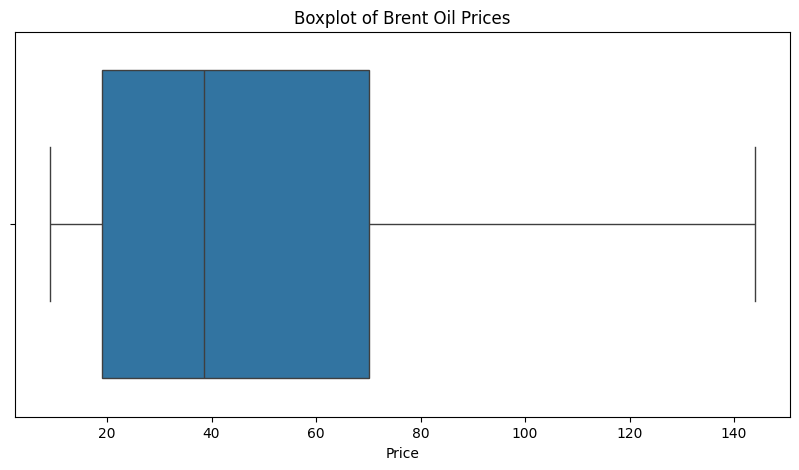

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Brent Oil Prices')
plt.show()


In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

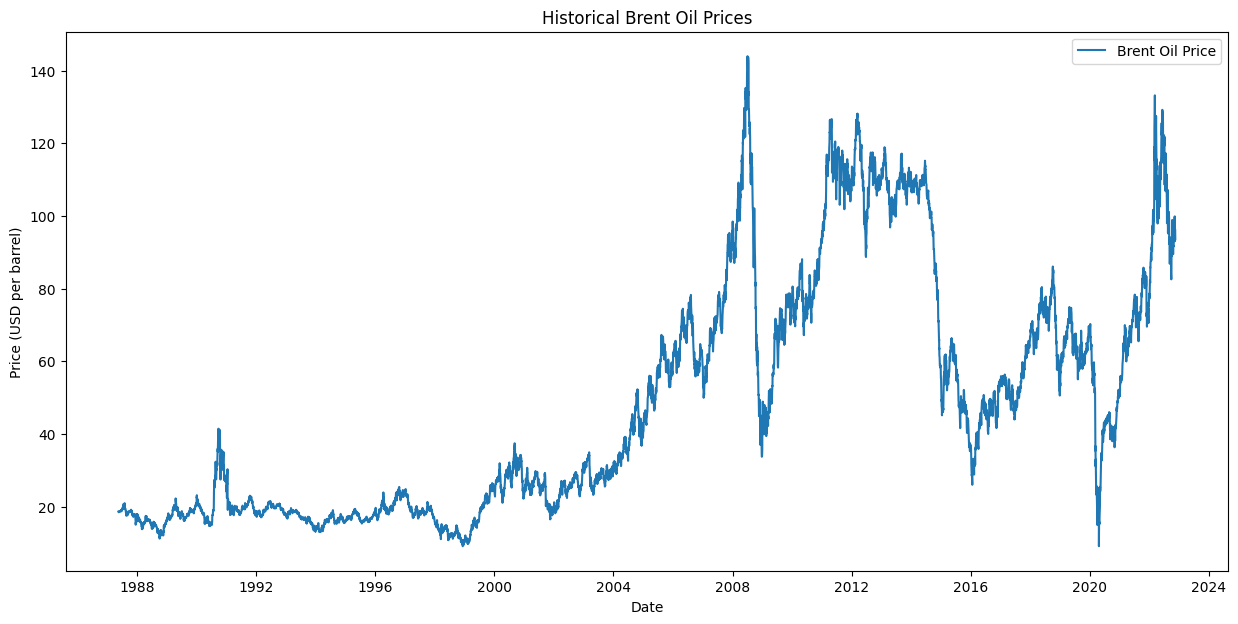

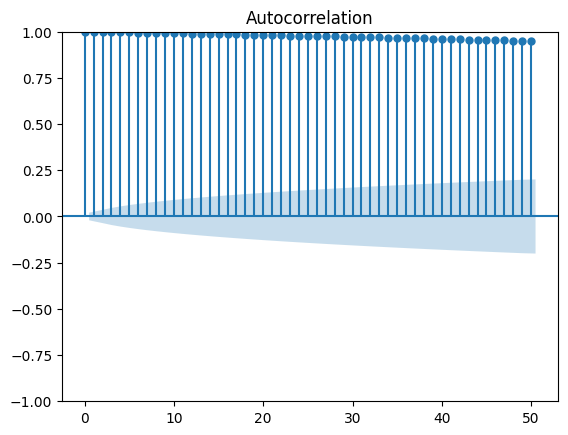

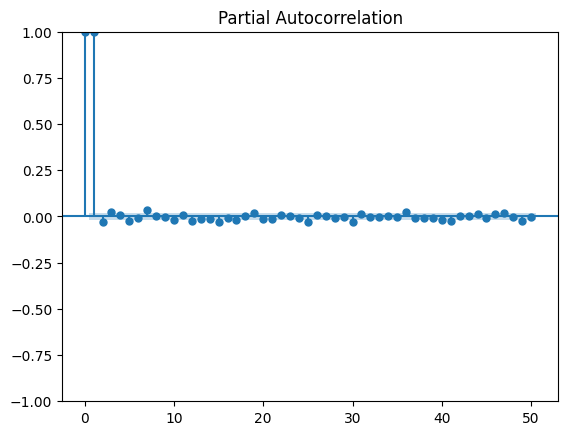

ADF Statistic: -1.9938560113924666
p-value: 0.2892735048934033


In [14]:
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Historical Brent Oil Prices')
plt.legend()
plt.show()

# ACF and PACF plots
plot_acf(df['Price'], lags=50)
plot_pacf(df['Price'], lags=50)
plt.show()

# Check stationarity
result = adfuller(df['Price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

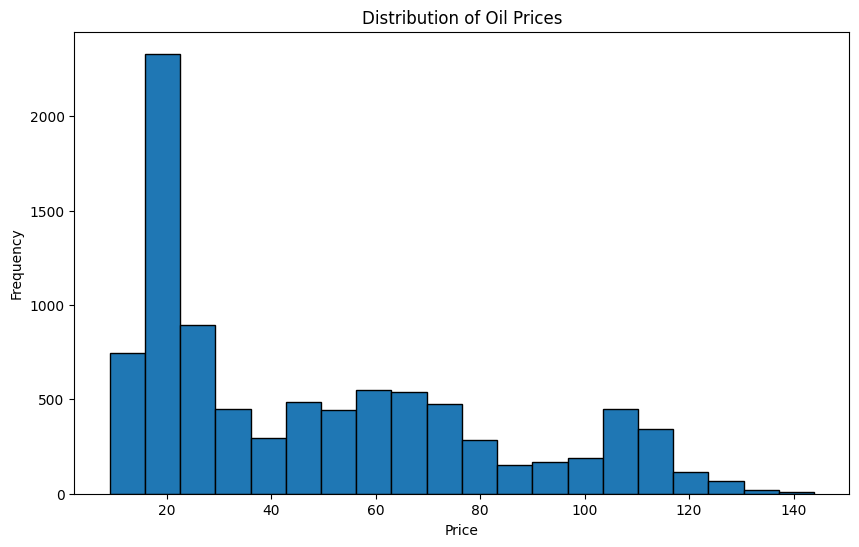

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.title('Distribution of Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

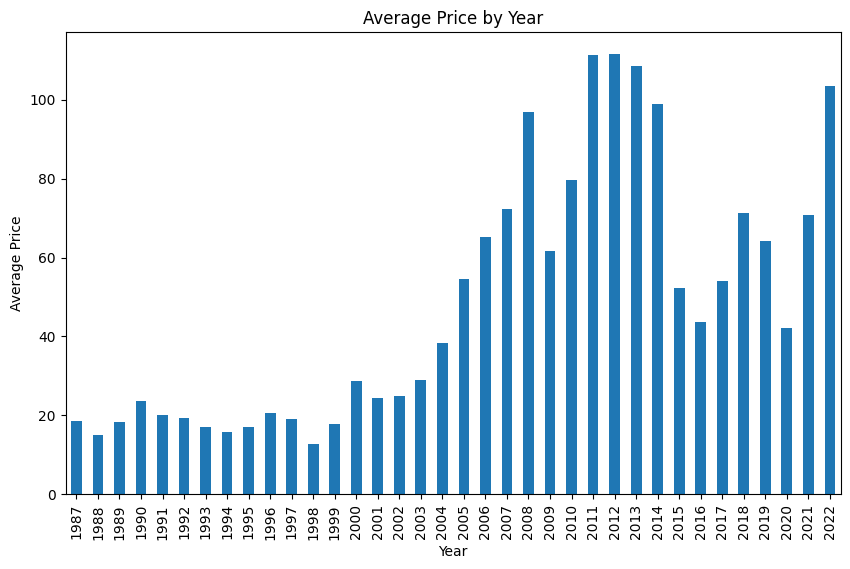

In [16]:
avg_price_per_year = df.groupby('Year')['Price'].mean()
plt.figure(figsize=(10, 6))
avg_price_per_year.plot(kind='bar')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [18]:
from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [19]:
# Apply differencing to make the series stationary
df['Price_diff'] = df['Price'].diff().dropna()

# Fit the ARIMA model
model = auto_arima(df['Price_diff'].dropna(), seasonal=False, trace=True)
model.summary()

# Fit the model with ARIMA parameters
arima_model = ARIMA(df['Price'], order=(5, 1, 0))
arima_result = arima_model.fit()
print(arima_result.summary())

NameError: name 'auto_arima' is not defined